In [40]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [41]:
import numpy as np
import pandas as pd

In [42]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [43]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [44]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [45]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [46]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [47]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [48]:
# Create our session (link) from Python to the DB
session = Session(engine)



In [49]:
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [50]:
Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

# Exploratory Climate Analysis

('2017-08-23',)
2016-08-23


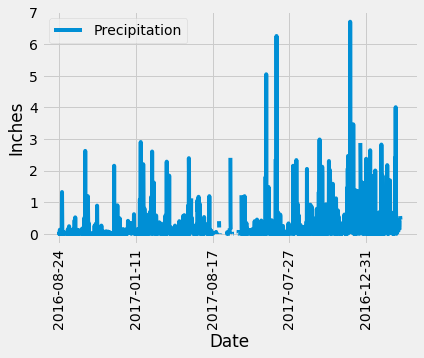

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database


last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)


# first_date = session.query(Measurement.date).order_by(Measurement.date).first()
# print(first_date)

year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

last_12_months = session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
# print(last_12_months)

# Perform a query to retrieve the data and precipitation scores
prcp_date = (Measurement.date, Measurement.prcp)
prcp_scores = session.query(*prcp_date).\
    filter(Measurement.date > year_ago).all()
    
# print(prcp_scores)

# Save the query results as a Pandas DataFrame and set the index to the date column
Precipitaion_df = pd.DataFrame(prcp_scores, columns=["Date", "Precipitation"])
Precipitaion_df.set_index("Date", inplace=True)
Precipitaion_df.head(100)

# Sort the dataframe by date
Precipitaion_df.sort_index()
Precipitaion_df.head(1000)

# Use Pandas Plotting with Matplotlib to plot the data
bar = Precipitaion_df.plot(rot=90)
bar.set_ylabel("Inches") 
bar

In [52]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precipitaion_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [53]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(func.count(Station.station)).all()
print(number_of_stations)

[(9,)]


In [54]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print(lowest_temp)
print(highest_temp)
print(avg_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [61]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_519 = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station =='USC00519281').\
    filter(Measurement.date >='2016,08,23' ).all()
print(station_519)
station_df = pd.DataFrame(station_519, columns=["Date", "Temperature"])
station_df.head()



[('2016-01-01', 74.0), ('2016-01-02', 72.0), ('2016-01-03', 68.0), ('2016-01-04', 69.0), ('2016-01-05', 70.0), ('2016-01-06', 69.0), ('2016-01-07', 76.0), ('2016-01-08', 75.0), ('2016-01-09', 74.0), ('2016-01-10', 74.0), ('2016-01-11', 73.0), ('2016-01-12', 75.0), ('2016-01-13', 74.0), ('2016-01-14', 66.0), ('2016-01-15', 71.0), ('2016-01-16', 73.0), ('2016-01-17', 75.0), ('2016-01-18', 63.0), ('2016-01-19', 61.0), ('2016-01-20', 62.0), ('2016-01-21', 65.0), ('2016-01-22', 65.0), ('2016-01-23', 75.0), ('2016-01-24', 78.0), ('2016-01-25', 69.0), ('2016-01-26', 65.0), ('2016-01-27', 69.0), ('2016-01-28', 64.0), ('2016-01-29', 68.0), ('2016-01-30', 73.0), ('2016-01-31', 74.0), ('2016-02-01', 69.0), ('2016-02-02', 68.0), ('2016-02-03', 69.0), ('2016-02-04', 65.0), ('2016-02-05', 67.0), ('2016-02-06', 69.0), ('2016-02-07', 70.0), ('2016-02-08', 56.0), ('2016-02-09', 57.0), ('2016-02-10', 58.0), ('2016-02-11', 61.0), ('2016-02-12', 71.0), ('2016-02-13', 74.0), ('2016-02-14', 71.0), ('2016-02

,Date,Temperature
0,2016-01-01,74.0
1,2016-01-02,72.0
2,2016-01-03,68.0
3,2016-01-04,69.0
4,2016-01-05,70.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002131ACA1C88>]],
      dtype=object)

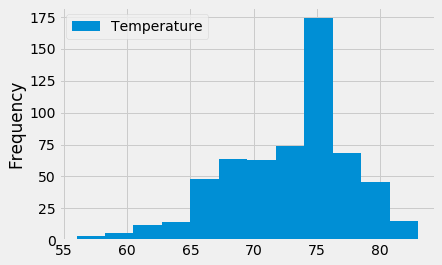

In [62]:
station_df.plot(kind="hist", bins=12)

hist

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
